In [72]:
# Quantitative Finance Project: Black-Scholes Model applied to real stock data, with option pricing and Delta visualization

In [73]:
import numpy as np
import scipy.stats as si
import matplotlib.pyplot as plt

In [74]:
!pip install yfinance --quiet
import yfinance as yf

In [75]:
# Writing the pricing function (Section 1 page 1)

In [76]:
# Using Apple Stock
ticker = "AAPL"
data = yf.Ticker(ticker)

# Current stock price
current_price = data.history(period="1d")['Close'][0]

# Estimate annualized volatility from last 1 year daily returns
history = data.history(period="1y")['Close']
daily_returns = history.pct_change().dropna()
volatility = np.std(daily_returns) * np.sqrt(252)  # Annualized

# Option parameters
K = 150            # Strike price
T = 30/365         # 30 days to expiration
r = 0.05           # Risk-free rate

# Price options using the Black-Scholes functions
call_price = black_scholes_call(S=current_price, K=K, T=T, r=r, sigma=volatility)
put_price = black_scholes_put(S=current_price, K=K, T=T, r=r, sigma=volatility)

print(f"{ticker} Current Price: ${current_price:.2f}")
print(f"Estimated Volatility (annualized): {volatility:.2%}")
print(f"Call Option Price: ${call_price:.2f}")
print(f"Put Option Price: ${put_price:.2f}")

AAPL Current Price: $264.58
Estimated Volatility (annualized): 32.37%
Call Option Price: $115.20
Put Option Price: $0.00


In [77]:
# Black-Scholes Call Function
# European Call: Right to buy underlying asset at strike price K
# Inputs: S (current stock price), K (strike), T (time to maturity), r (risk-free rate), sigma (volatility)
def black_scholes_call(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + 0.5*sigma**2)*T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * si.norm.cdf(d1) - K * np.exp(-r*T) * si.norm.cdf(d2)

In [78]:
# Black-Scholes Put Option Function
# Calculates European put option price, demonstrating quantitative finance implementation
def black_scholes_put(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + 0.5*sigma**2)*T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return K * np.exp(-r*T) * si.norm.cdf(-d2) - S * si.norm.cdf(-d1)

In [79]:
# Greeks measure how option prices change with different factors -> Delta
# Delta for a call option
def delta_call(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + 0.5*sigma**2)*T) / (sigma * np.sqrt(T))
    return si.norm.cdf(d1)

# Delta for a put option
def delta_put(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + 0.5*sigma**2)*T) / (sigma * np.sqrt(T))
    return si.norm.cdf(d1) - 1  # Correct Put Delta


In [80]:
# Compute option prices
call_prices = [black_scholes_call(S, K, T, r, sigma) for S in S_values]
put_prices = [black_scholes_put(S, K, T, r, sigma) for S in S_values]

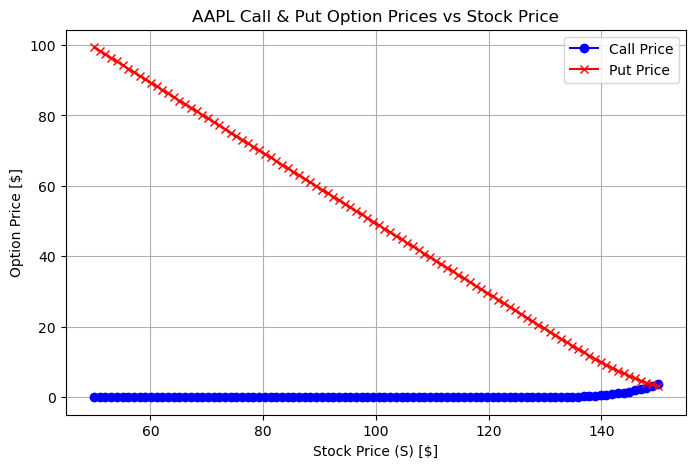

In [81]:
# Plot Option Prices
plt.figure(figsize=(8,5))
plt.plot(S_values, call_prices, marker='o', color='blue', label='Call Price')
plt.plot(S_values, put_prices, marker='x', color='red', label='Put Price')
plt.xlabel("Stock Price (S) [$]")
plt.ylabel("Option Price [$]")
plt.title(f"{ticker} Call & Put Option Prices vs Stock Price")
plt.legend()
plt.grid(True)
plt.show()

In [82]:
# Compute Greeks (Delta)
delta_calls = [delta_call(S, K, T, r, sigma) for S in S_values]
delta_puts = [delta_put(S, K, T, r, sigma) for S in S_values]

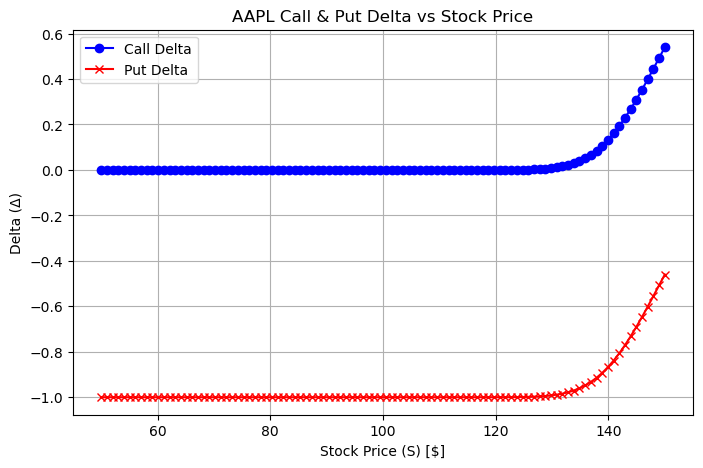

In [83]:
# Plot Delta
plt.figure(figsize=(8,5))
plt.plot(S_values, delta_calls, marker='o', color='blue', label='Call Delta')
plt.plot(S_values, delta_puts, marker='x', color='red', label='Put Delta')
plt.xlabel("Stock Price (S) [$]")
plt.ylabel("Delta (Δ)")
plt.title(f"{ticker} Call & Put Delta vs Stock Price")
plt.legend()
plt.grid(True)
plt.show()

In [84]:
# This assumption section explains: 
# 1. What conditions the Black-Scholes formula relies on
# 2. What simplifications you are making
# 3. Where the model may not be realistic
# Because real markets violate some of these assumptions

## Assumptions of the Black–Scholes Model

1. The stock price follows a geometric Brownian motion with constant volatility.
2. The risk-free interest rate r is constant over time.
3. No dividends are paid during the option’s life.
4. No transaction costs or taxes.
5. Options are European-style, meaning they can only be exercised at maturity.
6. Markets are frictionless, with continuous trading.
7. Investors can borrow and lend at the risk-free rate.

## Limitations of the Black–Scholes Model

- Real volatility is not constant.
- Market jumps and fat tails are ignored.
- Early exercise of American options is not considered.
- Liquidity and transaction costs are ignored.